# FOI requests data analysis

As of March 13, 2022, PST

In this notebook, we use the CSV file generated by the auto-scraper to make our analysis of FOI requests.

Remember that the **foi-ph-scraper** ideally scrapes new information from the website every Sunday of the week. The file generated is in a separate repository, which I will just read in here.

In [32]:
import pandas as pd
import re
import requests
from plotnine import *
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 2000)

## Read df and clean it

Read through the CSV, remove unnecessary columns, look for NaN values and duplicates, convert to datetime before you go through the data.

In [2]:
df = pd.read_csv('foi_final.csv')
df.tail(10)

Unnamed: 0  agency        date  \
109477      109477   DepEd  2022-02-20   
109478      109478     DOH  2022-02-20   
109479      109479     DOH  2022-02-20   
109480      109480     DOE  2022-02-20   
109481      109481   DepEd  2022-02-20   
109482      109482     DOH  2022-02-20   
109483      109483     OSG  2022-02-20   
109484      109484     FPA  2022-02-20   
109485      109485  MWSSCO  2022-02-20   
109486      109486     NTC  2022-02-20   

                                                    title   status  \
109477                                               NCAE  PENDING   
109478                                   Vaccination Card  PENDING   
109479                    Vaccine certificate and QR code  PENDING   
109480  GIS Shapefiles of the Solar and Wind Service C...  PENDING   
109481            National Carreer Assessment Examination  PENDING   
109482          The number of dengue cases in Quezon City  PENDING   
109483                                Nullity of marriage  PENDING   
109484      List of Approved Pesticide in the Philippines  PENDING   
109485               Bathymetry Data of La Mesa Watershed  PENDING   
109486                                   Threat text msgs  PENDING   

                                                  purpose  \
109477                            For transferring school   
109478                   Request for New Vaccination Card   
109479                                Vaccine certificate   
109480                               Undergraduate Thesis   
109481                 Request of my NCAE on my 6th grade   
109482                                           Research   
109483                                           Research   
109484                     Reference for Graduate Studies   
109485                           Research and Development   
109486  To trace who and where is this txter who sendi...   

                 period_covered  \
109477  02/20/2022 - 02/20/2022   
109478  02/20/2022 - 02/20/2022   
109479  02/20/2022 - 02/20/2022   
109480  01/01/2021 - 02/20/2022   
109481  02/15/2006 - 03/15/2010   
109482  01/01/2015 - 01/01/2022   
109483  09/25/2015 - 02/20/2022   
109484  02/20/2021 - 02/20/2022   
109485  02/09/2005 - 02/09/2020   
109486  11/15/2021 - 02/20/2022   

                                                     link reason_denial  
109477  https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
109478  https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
109479  https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
109480  https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
109481  https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
109482  https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
109483  https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
109484  https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
109485  https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
109486  https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN

## Drop 'Unnamed' column

In [3]:
df=df.drop('Unnamed: 0', axis=1)
df= df.sort_values('date')
df

agency        date                                              title  \
10235   DICT  2016-11-25  Projects to be implemented by the DICT for the...   
10252    NAP  2016-11-25                        History of Masbate Province   
10253   PCOO  2016-11-25  HIRING GOVERNMENT CAREER EMPLOYEES (RANK AND F...   
10255    PNP  2016-11-25       Crime Statatistics and Programs to Combat it   
10256    PSA  2016-11-25  The number of Filipinos From Upper Income Clas...   
...      ...         ...                                                ...   
8518    DOLE  2022-03-13  Request for Certificate of Involuntary Separat...   
8517     CIC  2022-03-13                             Unfair Debt Collectors   
8516     DOH  2022-03-13                           Vaxcert uncorrected name   
8529     OVP  2022-03-13                             SALN OF VICE PRESIDENT   
8543     LMB  2022-03-13  Coordinates and administrative boundaries of J...   

                     status  \
10235              ACCEPTED   
10252                CLOSED   
10253  PARTIALLY SUCCESSFUL   
10255                CLOSED   
10256                DENIED   
...                     ...   
8518                PENDING   
8517                PENDING   
8516                PENDING   
8529                PENDING   
8543                PENDING   

                                                 purpose  \
10235                                           Research   
10252                   Research and General Information   
10253                                 PUBLIC INFORMATION   
10255                                       School Paper   
10256                                           Research   
...                                                  ...   
8518   Request for Certificate of Involuntary Separat...   
8517   I want to stop and shutdown the apps. Kuya loa...   
8516                     Ma fix Ang mga mali sa pangalan   
8529                                        Transparency   
8543                                Undergraduate Thesis   

                period_covered  \
10235  11/25/2016 - 11/25/2016   
10252  01/01/1521 - 11/25/2016   
10253  11/25/2016 - 11/25/2016   
10255  01/01/2000 - 11/25/2016   
10256  01/01/2000 - 12/31/2015   
...                        ...   
8518   02/15/2022 - 02/15/2022   
8517   03/11/2022 - 03/12/2022   
8516   03/13/2022 - 03/13/2022   
8529   03/13/2022 - 03/13/2022   
8543   01/01/2015 - 03/12/2022   

                                                    link reason_denial  
10235                                                NaN             —  
10252                                                NaN             —  
10253                                                NaN             —  
10255                                                NaN             —  
10256                                                NaN             —  
...                                                  ...           ...  
8518   https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
8517   https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
8516   https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
8529   https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  
8543   https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...           NaN  

[109487 rows x 8 columns]

## Convert to datetime

In [4]:
df.dtypes

agency            object
date              object
title             object
status            object
purpose           object
period_covered    object
link              object
reason_denial     object
dtype: object

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.dtypes

agency                    object
date              datetime64[ns]
title                     object
status                    object
purpose                   object
period_covered            object
link                      object
reason_denial             object
dtype: object

## Check for duplicates

There are some duplicates found, but let's check. Remember, we only drop the duplicates if they are the same across **all columns**. Otherwise, we keep them, especially if the same requests are filed with different agencies.

In [7]:
df.duplicated().sum()

5250

In [33]:
df[df.duplicated()]

agency       date  \
103959           DOH 2022-01-24   
103961           BOI 2022-01-24   
103962           AFP 2022-01-24   
103964           DOH 2022-01-24   
103966          PCSO 2022-01-24   
103968           DOH 2022-01-24   
103975           NTC 2022-01-24   
2540             OVP 2022-01-24   
104039           OVP 2022-01-24   
104040           DOE 2022-01-24   
2508            PCSO 2022-01-24   
2506             DOH 2022-01-24   
2505             DOH 2022-01-24   
2497             DOH 2022-01-24   
2494             DOH 2022-01-24   
2493             OVP 2022-01-24   
2492            UsaP 2022-01-24   
2491          NAMRIA 2022-01-24   
2490             NLP 2022-01-24   
2487            PCSO 2022-01-24   
2486             OVP 2022-01-24   
2484             SSS 2022-01-24   
2510            DOLE 2022-01-24   
2511            DSWD 2022-01-24   
2538            DSWD 2022-01-24   
2537             BOC 2022-01-24   
2536            HDMF 2022-01-24   
2535            LLFC 2022-01-24   
2534             UPD 2022-01-24   
2533             NBI 2022-01-24   
2531             BIR 2022-01-24   
2530             ECC 2022-01-24   
2529            PCSO 2022-01-24   
2528             DOH 2022-01-24   
2527             DOH 2022-01-24   
2526             DOH 2022-01-24   
2523            JJWC 2022-01-24   
2519             DOJ 2022-01-24   
2483           DepEd 2022-01-24   
2482            DSWD 2022-01-24   
2488          PAGASA 2022-01-24   
103894          DOLE 2022-01-24   
103895           BIR 2022-01-24   
103896           NBI 2022-01-24   
103897           TSU 2022-01-24   
103899           BIR 2022-01-24   
103901           LTO 2022-01-24   
103902           SSS 2022-01-24   
103903          CHED 2022-01-24   
103893          DOLE 2022-01-24   
103906           PAO 2022-01-24   
103909          PPPI 2022-01-24   
103911           PSA 2022-01-24   
103912         DepEd 2022-01-24   
103892          PCGG 2022-01-24   
103898           ECC 2022-01-24   
103890           PNP 2022-01-24   
103866           OVP 2022-01-24   
103872           OVP 2022-01-24   
103870         DepEd 2022-01-24   
103888           PSA 2022-01-24   
103887           LTO 2022-01-24   
103885           DOH 2022-01-24   
103884          BSWM 2022-01-24   
103889            IC 2022-01-24   
103880           DOH 2022-01-24   
103879            IC 2022-01-24   
103883        NAMRIA 2022-01-24   
2386             CGA 2022-01-25   
2388             AFP 2022-01-25   
2403             MGB 2022-01-25   
104066           DOH 2022-01-25   
2404        PHIVOLCS 2022-01-25   
2385             ECC 2022-01-25   
2440             ECC 2022-01-25   
2384             LMB 2022-01-25   
2383             LMB 2022-01-25   
2382             APO 2022-01-25   
2315             BIR 2022-01-25   
2312             DOH 2022-01-25   
104060        NAMRIA 2022-01-25   
104062          DENR 2022-01-25   
2373            OWWA 2022-01-25   
2374             OVP 2022-01-25   
2377            BLGF 2022-01-25   
2379            OWWA 2022-01-25   
2380             PSA 2022-01-25   
2372            POEA 2022-01-25   
2345             SSS 2022-01-25   
2359             BIR 2022-01-25   
2347             SSS 2022-01-25   
2348             NTC 2022-01-25   
104178        NAMRIA 2022-01-25   
104179           DOH 2022-01-25   
104180           BIR 2022-01-25   
104181           DFA 2022-01-25   
104182           MGB 2022-01-25   
104183           ECC 2022-01-25   
104185           OVP 2022-01-25   
104186           BIR 2022-01-25   
104187          CHED 2022-01-25   
104188           PUP 2022-01-25   
104189           NBI 2022-01-25   
104190          PCSO 2022-01-25   
104191           DOH 2022-01-25   
104193           DOH 2022-01-25   
104194           NTC 2022-01-25   
104195         BULSU 2022-01-25   
104196           DOH 2022-01-25   
104177           LRA 2022-01-25   
104197           PSA 2022-01-25   
104176           DOH 2022-01-25   
104174        NAMRIA 2022-01-25   
104156           DOH 202

**Interpretation**: In this instance, we decide to keep the duplicates since as we can see, there are similar requests made to various agencies and we wanted to track how they deal with each request.

## Looking into the NaNs

We look for null values and whether they account for significant number of the data.

In [9]:
df.isna().sum()

agency                0
date                  0
title                 2
status                0
purpose               2
period_covered        0
link              90765
reason_denial     18722
dtype: int64

Interpretation: The **link** column have over 91,000 null values. This is because a large part of the data in our df came from an existing CSV maintained by the government. The same goes for **reason_denial.**

You can find the CSV here: https://docs.google.com/spreadsheets/d/1kblO1_-gL65qXu_EJJBvc59UUHBQ7K3c/edit?fbclid=IwAR332h3xXbevTcnDiKQwKWldsod3kPP3J0T9_5NSXALgFI7XZPyIxMuqXg0#gid=875187444

The data is updated quarterly. We merged this data early on with the scraped data from the website.

## Analysis

Now that we have all the requests contained in one file, we can now analyze them, still using pandas.

## How much of the requests are granted or denied?

In [10]:
df.status.value_counts(normalize=True) * 100

SUCCESSFUL                40.486998
DENIED                    24.791071
PENDING                   12.689178
PARTIALLY SUCCESSFUL       7.423712
ACCEPTED                   5.500196
CLOSED                     3.163846
AWAITING CLARIFICATION     2.991223
REFERRED                   1.805694
PROCESSING                 1.126161
EXTENDED                   0.021920
Name: status, dtype: float64

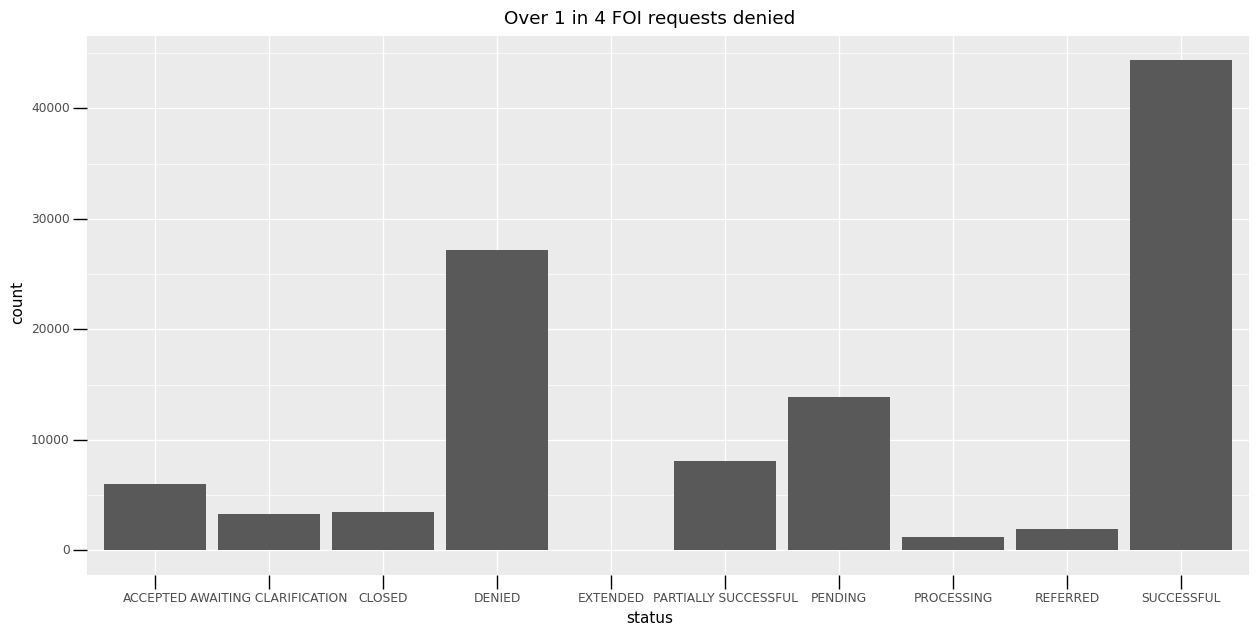

<ggplot: (297987160)>

In [11]:
(
    ggplot(df) + 
    geom_bar(aes(x="status")) + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Over 1 in 4 FOI requests denied")
)

Note: We are still seeking clarification from PCOO on what **CLOSED** means. Meanwhile, over one in four FOI requests are denied by agencies. Over half are **successful** or **partially sucessful**. 

## Which agencies get the most FOI requests?

In [12]:
df.agency.value_counts().head(10)

DOH      9202
PSA      6302
DOLE     5550
BIR      4756
SSS      4495
DepEd    4308
OWWA     4158
DSWD     3835
NTC      3515
DPWH     2810
Name: agency, dtype: int64

The Department of Health, Philippine Statistics Authority and the labor department get the most requests.

## Which agencies deny the most requests?

The Bureau of Internal Revenue tops the list, although a deeper probe would show most of the denials were a result of requests for personal tax records, which are not for public consumption.

In [13]:
df[df.status=="DENIED"].agency.value_counts().head(10)

BIR     2849
DSWD    2371
DENR    1308
DOH     1094
DTI     1064
DOLE     827
DOTr     784
HDMF     702
DILG     591
PSA      508
Name: agency, dtype: int64

# Drilling down on specific agencies and requests

We select a few agencies and search in their request files some of the most common requests by **title** as well as some of the most denials. 

## DOH: Vaccination certificates

In [14]:
df[df.agency=="DOH"].title.value_counts().head(20)

Vaccination Certificate     290
Vaxcert                     132
VaxCert                      79
Vaccine Certificate          71
Vaccination certificate      70
VAXCERT                      56
Lost Vaccination Card        54
Vaccination Card             51
Vax Cert                     47
VACCINATION CERTIFICATE      42
Vax Certificate              39
Vaccine certificate          38
VaxCertPH                    33
Lost Vaccine Card            32
vaxcert                      32
vaccination certificate      25
Swab test result             22
Vaccination card             22
Booster Shot Certificate     21
VAX CERT                     18
Name: title, dtype: int64

In [15]:
vax = ["Vaccination Certificate", "Vaxcert", "VaxCert", "Vaccination certificate", "Vax Cert", "VAXCERT", "VAX CERT", "Vax Certificate", "Vax certificate", "VACCINATION CERTIFICATE", "Vax cert", "VaxCertPH", "Vax Cert PH", "vax cert", "Vax cert request", "Vax Cert Request", "Vaccination Card", "Vax card", "vaccination card", "Vaccine certificate", "vaccine certificate"]
df_vax = df[df['title'].isin(vax)].reset_index(drop=True)
df_vax.count()

agency            1049
date              1049
title             1049
status            1049
purpose           1049
period_covered    1049
link               613
reason_denial      436
dtype: int64

Interpretation: Over one in 10 DOH requests from 2016 were to request for vaccination certificates.

## DSWD: Social amelioration program

This is the P275-billion pandemic relief program by the government in 2020 that gave dole outs to poor families. The program were given in two tranches and were marred by significant delays and other irregularities.

In [16]:
sap = ["SAP", "SAP 2nd tranche", "Sap 2nd tranche", "Social Amelioration Program", "Social amelioration program", "sap 2nd tranche", "SAP 2nd tranche", "2nd tranche", "DSWD SAP", "SAP 2ND TRANCHE", "Sap 2nd Tranche", "SAP 1st tranche", "SAP first tranche", "SAP 1ST TRANCHE", "Sap"]
df_sap = df[df['title'].isin(sap)].reset_index(drop=True)
df_sap[df_sap.status=="DENIED"].head(10)

agency       date                        title  status  \
0   DSWD 2020-04-09  Social amelioration program  DENIED   
1   DSWD 2020-04-21  Social Amelioration Program  DENIED   
2   DSWD 2020-04-21                          Sap  DENIED   
3   DSWD 2020-04-23  Social Amelioration Program  DENIED   
4   DSWD 2020-04-25  Social Amelioration Program  DENIED   
5   DSWD 2020-04-27  Social Amelioration Program  DENIED   
6   DSWD 2020-04-27                     DSWD SAP  DENIED   
7   DSWD 2020-05-01  Social Amelioration Program  DENIED   
8   DSWD 2020-05-01                          SAP  DENIED   
9   DSWD 2020-05-03                          Sap  DENIED   

                                             purpose           period_covered  \
0                          Personal information only  04/09/2020 - 04/09/2020   
1             Transparency purposes to my kabarangay  04/01/2020 - 04/21/2020   
2                                        Solo parent  04/08/2020 - 04/21/2020   
3                        Validation and Confirmation  04/23/2020 - 04/23/2020   
4  To known the list of beneficiaries of Social A...  03/01/2020 - 04/25/2020   
5                                       Transparency  04/19/2020 - 04/27/2020   
6    To know the status of DSWD SAP in our Barangay.  04/27/2020 - 04/27/2020   
7                        Social Amelioration Program  03/16/2020 - 04/30/2020   
8                                    SAP APPLICATION  05/01/2020 - 05/01/2020   
9          Applying for special amelioration program  03/21/2020 - 04/21/2020   

  link       reason_denial  
0  NaN                   —  
1  NaN                   —  
2  NaN                   —  
3  NaN                   —  
4  NaN                   —  
5  NaN                   —  
6  NaN                   —  
7  NaN  incomplete-request  
8  NaN                   —  
9  NaN                   —

Interpretation: Most requests for SAP were denied and were deemed an "invalid request."

In [17]:
df_sap.count()
#180 requests about SAP.

agency            176
date              176
title             176
status            176
purpose           176
period_covered    176
link                1
reason_denial     175
dtype: int64

## OVP: Any type of "assistance"

The office is known for its **Angat Buhay** program that helps the poor.

In [18]:
df[df.agency=="OVP"].title.str.contains("assistance", regex=False, case=False).value_counts()

False    502
True     339
Name: title, dtype: int64

Interpretation: 40% of OVP FOI requests mention some form of "assistance".

## BIR: Tax identification number or TIN

Tax matters are generally protected by privacy laws in the Philippines. But that did not stop some people to request for them through FOI.

In [19]:
#df_final[df_final.title=="Income Tax Return"]
tax = ['Income Tax Return', 'ITR','BIR 2316', 'TIN Verification', 'TIN VERIFICATION', 'BIR Form 2316', 'Income tax return', 'TIN', 'INCOME TAX RETURN', 'Form 2316', 'TIN NUMBER', 'tin number', 'TIN verification']
df_tax = df[df['title'].isin(tax)].reset_index(drop=True)
df_tax.head(7)

agency       date       title                status  \
0    BIR 2019-03-03  tin number            SUCCESSFUL   
1    BIR 2019-03-07         TIN            SUCCESSFUL   
2    BIR 2019-06-12         TIN            SUCCESSFUL   
3    BIR 2019-09-26         TIN            SUCCESSFUL   
4    BIR 2019-10-11  tin number                DENIED   
5    BIR 2019-11-29    BIR 2316  PARTIALLY SUCCESSFUL   
6    BIR 2019-12-26         TIN                DENIED   

                   purpose           period_covered link       reason_denial  
0               employment  03/03/2007 - 03/03/2010  NaN                   —  
1                 Lot sale  01/01/2005 - 03/07/2019  NaN                   —  
2  Opening of Bank account  06/12/2019 - 06/12/2019  NaN                   —  
3   For issuance of tin ID  03/29/2019 - 06/22/2019  NaN                   —  
4               employment  09/05/2019 - 10/10/2019  NaN  incomplete-request  
5                BANK LOAN  01/01/2018 - 12/31/2018  NaN                   —  
6         For verification  07/26/2019 - 12/26/2019  NaN                   —

In [20]:
df_tax.status.value_counts(normalize=True) *100

DENIED                    50.919265
AWAITING CLARIFICATION    34.692246
PENDING                    4.796163
SUCCESSFUL                 4.636291
ACCEPTED                   2.398082
PARTIALLY SUCCESSFUL       1.278977
CLOSED                     0.639488
REFERRED                   0.399680
PROCESSING                 0.239808
Name: status, dtype: float64

# Know each agencies' performance 

Just changed the name of the agency in brackets.

In [21]:
df[df.agency=="OP"]
#There were some requests for SALN.

agency       date                                              title  \
12793      OP 2017-12-01  Total cost/expenses for the foreign trips of P...   
12814      OP 2017-12-04  Cost of President Duterte's foreign trips in h...   
12838      OP 2017-12-05  Updates on the appeals of suspended and closed...   
12929      OP 2017-12-24                    2018 General Appropriations Act   
12947      OP 2017-12-30                     Executive Order 126 dated 1959   
13255      OP 2018-01-31     NSC Group Photos with Living Former Presidents   
13403      OP 2018-02-11  Documentary proof or evidence of President Dut...   
13394      OP 2018-02-11  Breakdown of War Materiel used by the AFP in t...   
13389      OP 2018-02-11  What is the counterpart of the CIA in the Phil...   
13436      OP 2018-02-13               Actual Expenses of ASEAN 2017 budget   
13687      OP 2018-03-03  Impact of OFW remittances on the Philippine Ec...   
13700      OP 2018-03-04                                 Appointment Papers   
85765      OP 2021-09-29    Statement of Assets, Liabilities, and Net Worth   
87220      OP 2021-10-07  Statement of Assets, Liabilities, and Net Wort...   
87243      OP 2021-10-07  Statement of Assets, Liabilities, and Net Wort...   
89066      OP 2021-10-18  Accomplishments and Negative Impact of late Fe...   
94137      OP 2021-11-15  PRESIDENTIAL SINCE 1965 BUDGET FROM START OF T...   
97488      OP 2021-12-03  You money building you steal everything you fo...   
97489      OP 2021-12-03             National Budget from Marcos Presidency   
106939     OP 2022-02-08          Government Directory from 1900 to present   
24         OP 2022-02-08          Government Directory from 1900 to present   

         status                                            purpose  \
12793   PENDING  For research purposes for my year-end report f...   
12814   PENDING                                      News research   
12838   PENDING                                           Research   
12929   PENDING  Factual basis in research and review of certai...   
12947   PENDING                                            HISTORY   
13255   PENDING                     Research and Archive purposes.   
13403   PENDING                Research for Graduate School class.   
13394   PENDING                Research for Graduate School class.   
13389   PENDING                                           Research   
13436   PENDING                                  Research purposes   
13687   PENDING                                 Practical Research   
13700   PENDING                       Personal Reference / Inquiry   
85765   PENDING               Research and other academic purposes   
87220   PENDING                     Academic and Research purposes   
87243   PENDING                     Academic and Research Purposes   
89066   PENDING                           Research and Development   
94137   PENDING  I Want to do a small study for my own educatio...   
97488   PENDING  Pera lahat records justices Icc criminal court...   
97489   PENDING                              For Research Purposes   
106939  PENDING                             Undergraduate Research   
24      PENDING                             Undergraduate Research   

                 period_covered  \
12793   01/01/2017 - 12/01/2017   
12814   07/01/2016 - 07/01/2017   
12838   02/02/2017 - 12/05/2017   
12929   12/24/2017 - 12/24/2017   
12947   12/30/2017 - 12/30/2017   
13255   07/27/2016 - 07/27/2016   
13403   03/28/1945 - 02/11/2018   
13394   05/23/2017 - 11/23/2017   
13389   02/11/2018 - 02/11/2018   
13436   01/01/2017 - 01/01/2018   
13687   02/25/2018 - 03/03/2018   
13700   06/30/2016 - 03/04/2018   
85765   01/01/2018 - 12/31/2020   
87220   01/01/2018 - 10/01/2020   
87243   01/01/2018 - 10/01/2020   
89066   09/21/1972 - 09/21/1986   
94137   12/30/1965 - 11/14/2021   
97488   12/01/2021 - 12/01/2021   
97489   12/30/1965 - 12/02/2021   
106939  01/01/1900 - 01/01/

## Top reasons for denial

Applicable only to data as of December 2021.

In [22]:
df.reason_denial.value_counts(dropna=False)
#"-" means it's not applicable since the request was not denied.

—                               77314
NaN                             18722
wrong-agency                     6980
incomplete-request               2764
invalid-request                  2084
information-available-online     1620
exceptions                          2
privacy                             1
Name: reason_denial, dtype: int64

# SALN requests, anyone?

Stands for "Statements of Assets, Liabilities and Net Worth" filed by public officials every year.

In [23]:
df.title.str.contains("SALN", regex=False, case=False).value_counts()

False    109218
True        267
Name: title, dtype: int64

Over 200 requests using the exact words "SALN" on the FOI portal. Below, we use a regex pattern to screen this more.

In [24]:
df.title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).count()
#260 requests mentioning SALN.

0    260
dtype: int64

In [25]:
df[df.agency=="OVP"].title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).value_counts().sum()
#66 requests for the SALN of the Vice President.

72

## Track request numbers through time

### By month

In [26]:
month_query = df.resample('M', on='date').title.count().to_frame().reset_index()
month_query.tail()

date  title
60 2021-11-30   5349
61 2021-12-31   4004
62 2022-01-31   5782
63 2022-02-28  10200
64 2022-03-31   2740

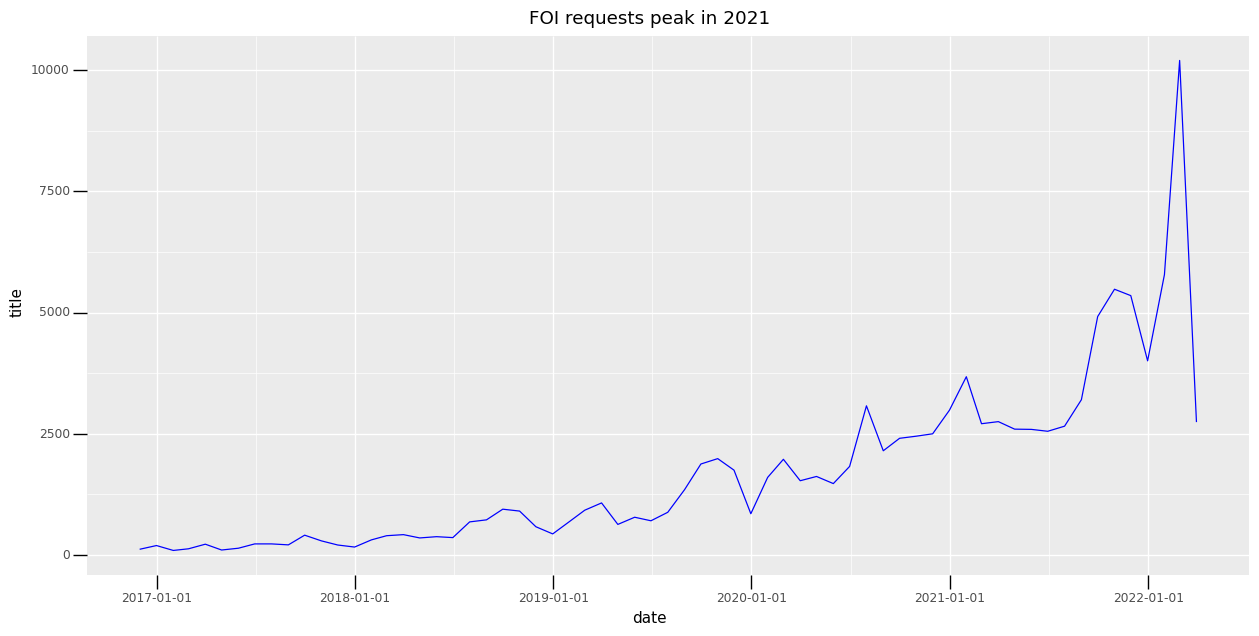

<ggplot: (297987328)>

In [27]:
(
    ggplot(month_query, aes(x="date", y="title")) + 
    geom_line(color="blue", stat="identity") + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="FOI requests peak in 2021")
)

In [28]:
df.resample('M', on='date').title.count().sort_values(ascending=False).head(10)
#Largest number of FOI requests recorded in February 2022.

date
2022-02-28    10200
2022-01-31     5782
2021-10-31     5481
2021-11-30     5349
2021-09-30     4917
2021-12-31     4004
2021-01-31     3676
2021-08-31     3202
2020-07-31     3076
2020-12-31     2987
Name: title, dtype: int64

### By year

In [29]:
year_query = df.resample('A', on='date').title.count().to_frame().reset_index()
year_query

date  title
0 2016-12-31    311
1 2017-12-31   2413
2 2018-12-31   6484
3 2019-12-31  13489
4 2020-12-31  25588
5 2021-12-31  42478
6 2022-12-31  18722

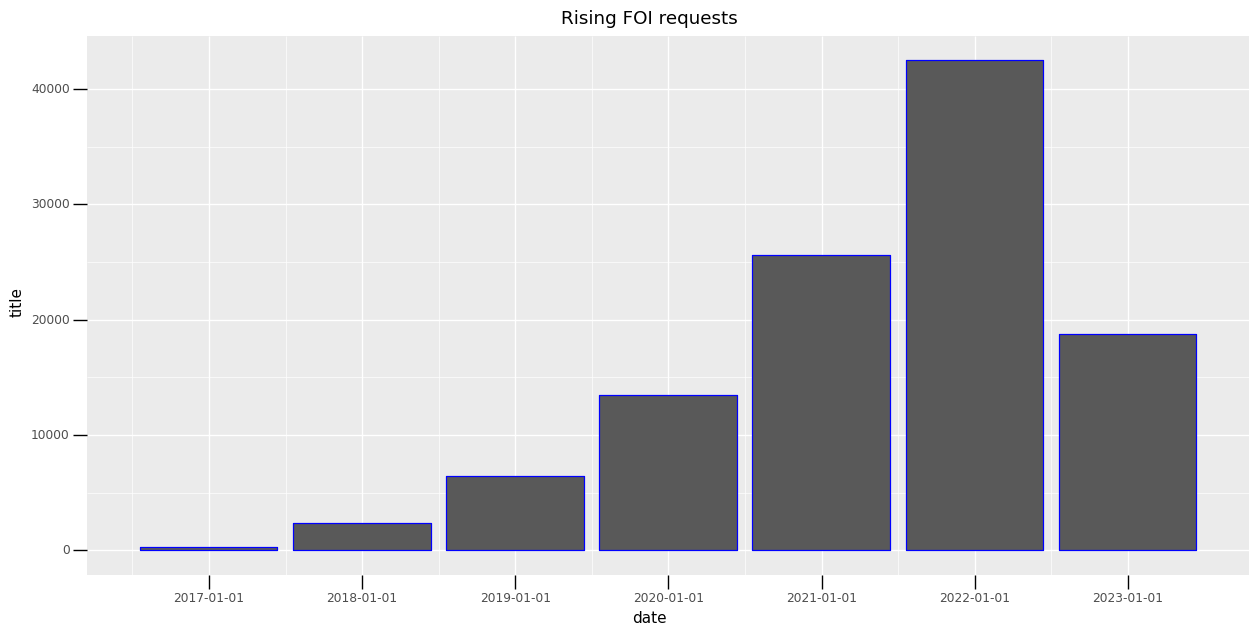

<ggplot: (298085440)>

In [30]:
(
    ggplot(year_query, aes(x="date", y="title")) + 
    geom_col(color="blue") + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Rising FOI requests")
)

## Year-on-year change shows slowing down increase in FOI requests

In [31]:
df.resample('A', on='date').title.count().pct_change() * 100
#2016 started in September. 2022 as of few weeks of January.

date
2016-12-31           NaN
2017-12-31    675.884244
2018-12-31    168.711148
2019-12-31    108.035163
2020-12-31     89.695307
2021-12-31     66.007504
2022-12-31    -55.925420
Freq: A-DEC, Name: title, dtype: float64

# End.